In [1]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df_pubmed = pd.read_csv('trained\pubmed_weights.csv')

In [3]:
df_nodes=pd.read_csv('trained\pubmed_labels.csv')

In [4]:
#scaler = MinMaxScaler(feature_range=(0, 1)) #
#df_pubmed['weight'] = scaler.fit_transform(df_pubmed[['weight']])#
#df_pubmed.head()

In [5]:
pubmed_graph= nx.from_pandas_edgelist(df_pubmed, 'source', 'target', create_using=nx.DiGraph())

In [6]:
GNN_dist= nx.from_pandas_edgelist(df_pubmed, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [7]:
df_pubmed_sim = df_pubmed[['source','target','weight']]
df_pubmed_sim['weight']= 1 / df_pubmed['weight'] 
df_pubmed_sim.head()

,source,target,weight
0,0,1378,1.117837
1,0,1544,1.067311
2,0,6092,1.051998
3,0,7636,0.403427
4,0,14442,0.970309


In [8]:
GNN_sim= nx.from_pandas_edgelist(df_pubmed_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_pubmed

In [9]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [10]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

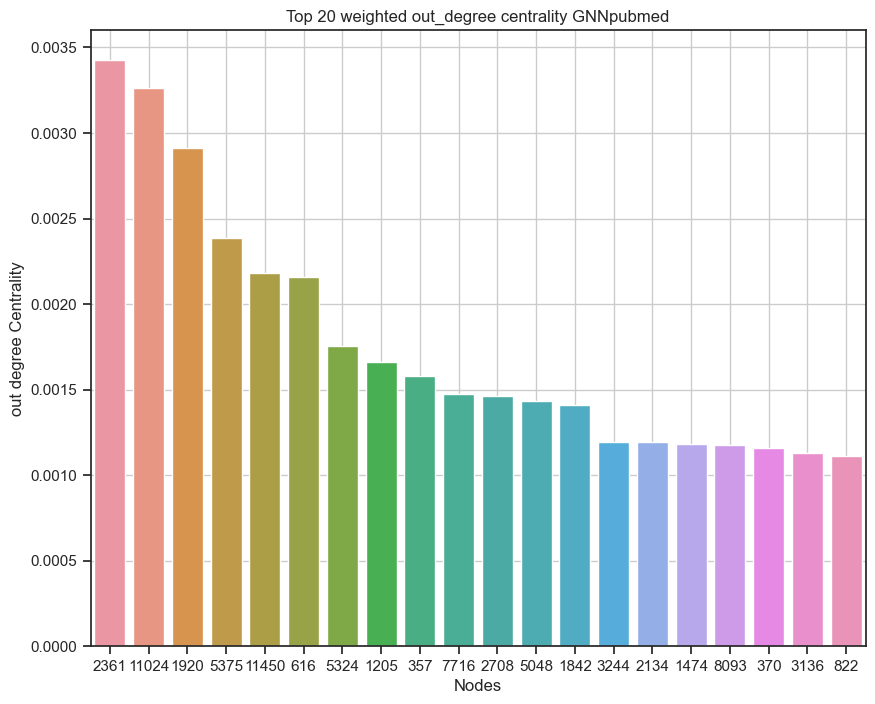

In [11]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNpubmed')
plt.grid()
plt.show()

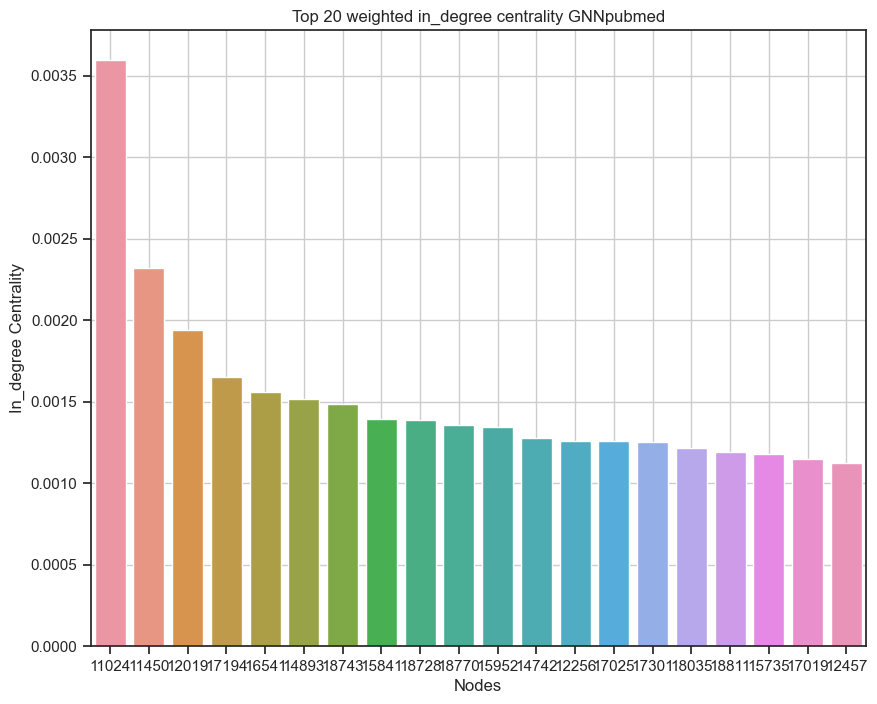

In [12]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNpubmed')
plt.grid()
plt.show()

## pubmed graph

In [13]:
pubmed_out_degree = weighted_out_degree(pubmed_graph)
pubmed_in_degree = weighted_in_degree(pubmed_graph)

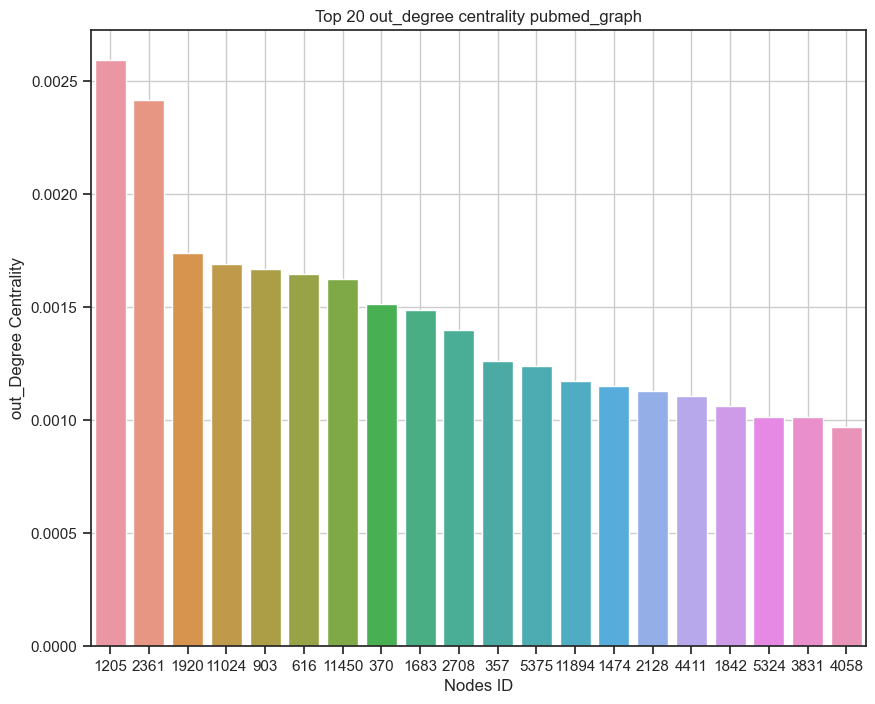

In [14]:

keys = list(map(str,list(pubmed_out_degree.keys())[:20]))
values = list(pubmed_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality pubmed_graph')
plt.grid()
plt.show()

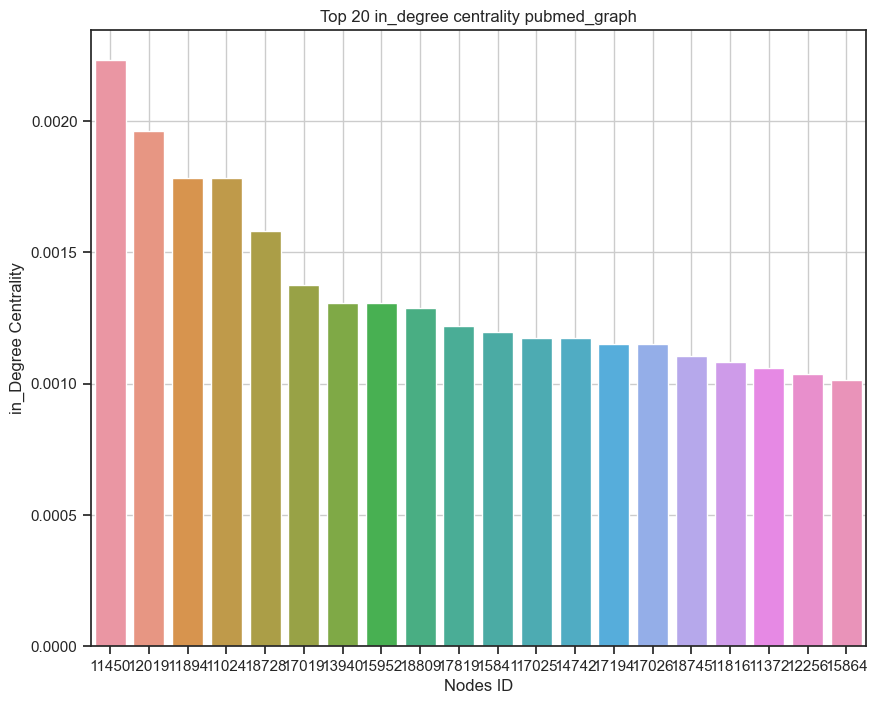

In [15]:
keys = list(map(str,list(pubmed_in_degree.keys())[:20]))
values = list(pubmed_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality pubmed_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_pubmed

In [16]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

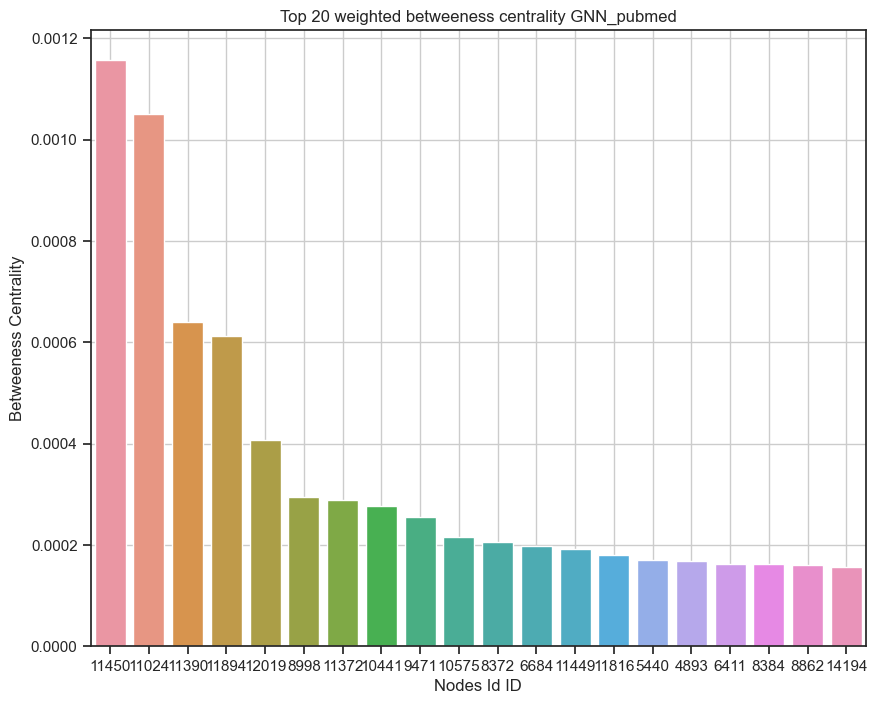

In [17]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_pubmed')
plt.grid()
plt.show()

## pubmed graph

In [18]:
bet_pubmed_graph = nx.betweenness_centrality(pubmed_graph)

KeyboardInterrupt: 

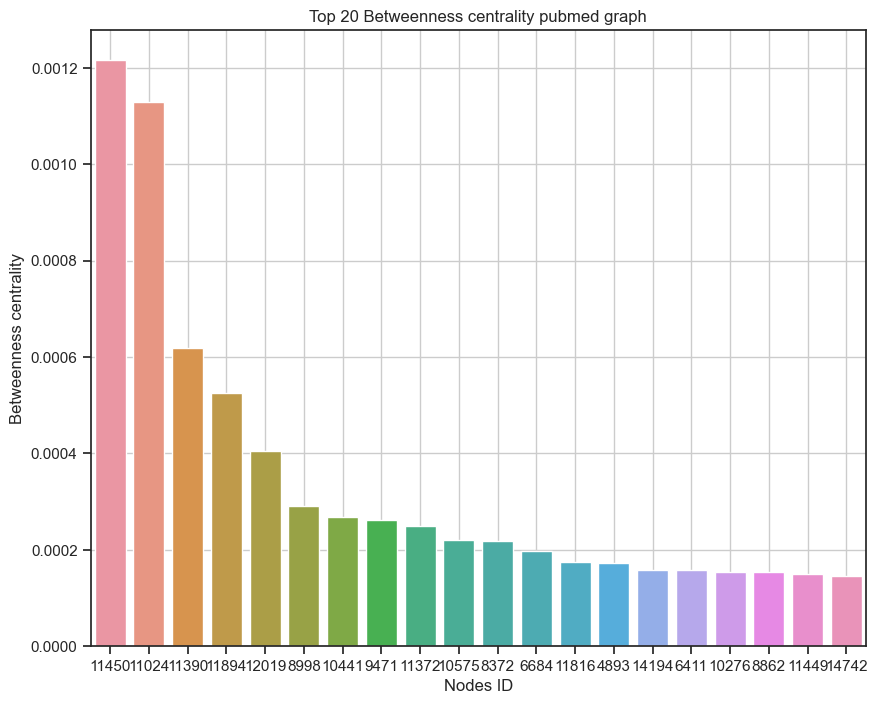

In [ ]:
bet_pubmed_graph = dict(sorted(bet_pubmed_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_pubmed_graph.keys())[:20]))
values = list(bet_pubmed_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality pubmed graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_pubmed

In [ ]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

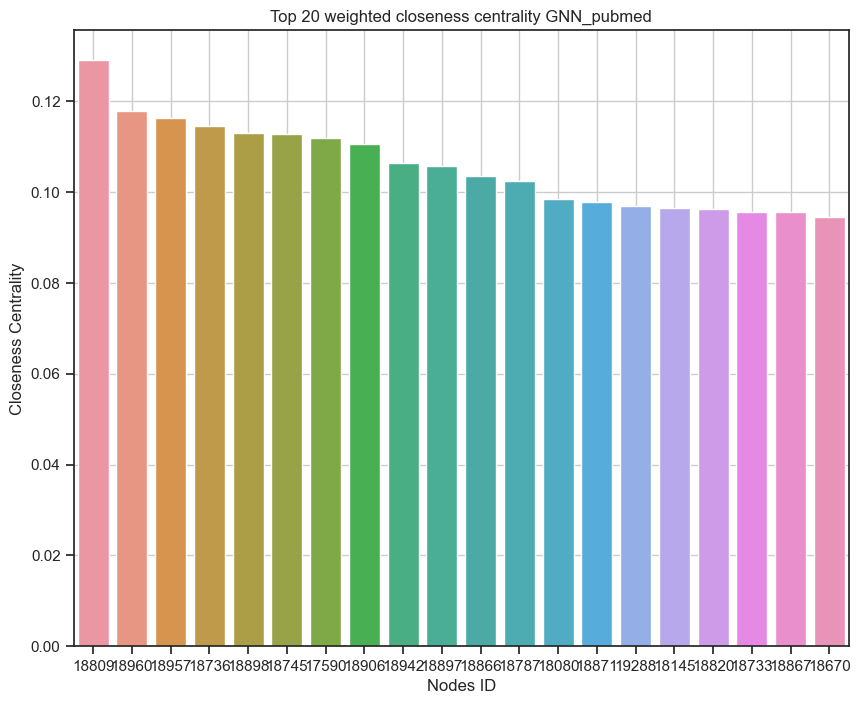

In [ ]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_pubmed')
plt.grid()
plt.show()

## pubmed

In [ ]:
closeness_pubmed_graph = nx.closeness_centrality(pubmed_graph)

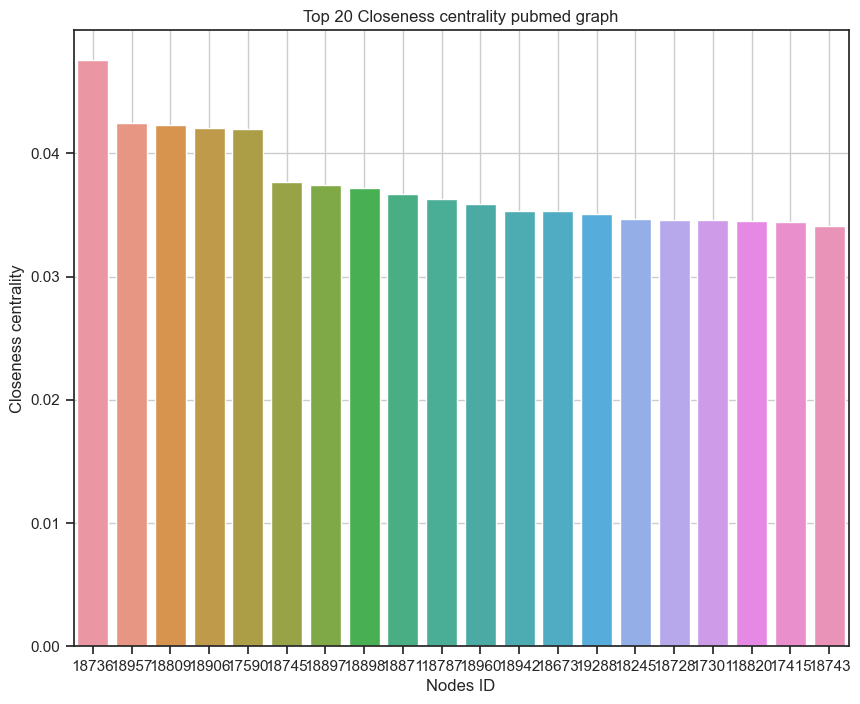

In [ ]:
closeness_pubmed_graph = dict(sorted(closeness_pubmed_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_pubmed_graph.keys())[:20]))
values = list(closeness_pubmed_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality pubmed graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_pubmed

In [ ]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 300)

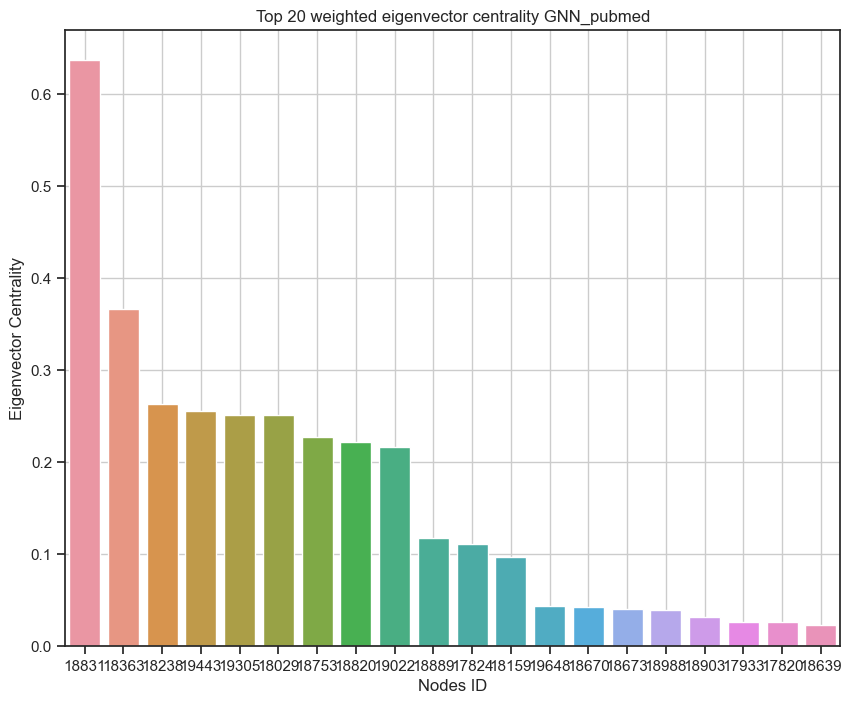

In [ ]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_pubmed')
plt.grid()
plt.show()

## pubmed graph

In [ ]:
eigen_pubmed_graph = nx.eigenvector_centrality(pubmed_graph,max_iter = 300)

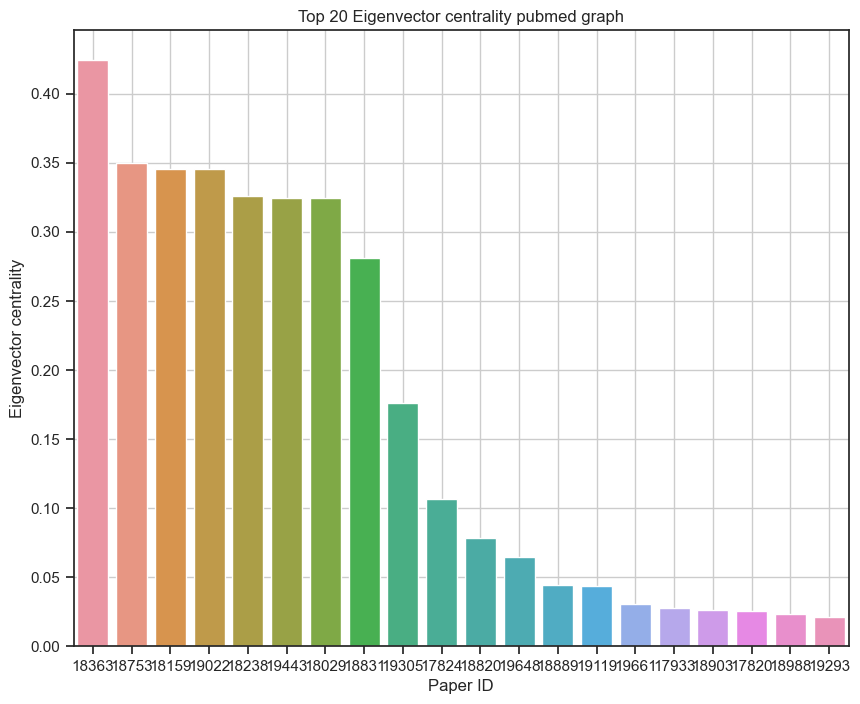

In [ ]:
eigen_pubmed_graph = dict(sorted(eigen_pubmed_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_pubmed_graph.keys())[:20]))
values = list(eigen_pubmed_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality pubmed graph')
plt.grid()
plt.show()

# Efficiency

In [ ]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [ ]:
GNN_dist.number_of_nodes()

19717

In [ ]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

0.007

In [ ]:
weighted_global_efficiency(pubmed_graph)

0.002

## Modularity

In [ ]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [ ]:
print(weighted_modularty(GNN_sim))

0.746


In [ ]:
print(weighted_modularty(pubmed_graph))

0.724


# Community

In [ ]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [ ]:


comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_pubmed = greedy_modularity_communities(pubmed_graph)

In [ ]:
print(len(comm_GNN))
print(len(comm_pubmed))

100
121


In [ ]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [ ]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [ ]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_pubmed = [gini_index(i,labels) for i in comm_pubmed]
scipy.stats.wilcoxon(gini_GNN, gini_pubmed[:100])

WilcoxonResult(statistic=1433.0, pvalue=0.019798107247969005)

In [ ]:
scipy.stats.mannwhitneyu(gini_GNN, gini_pubmed)

MannwhitneyuResult(statistic=4188.0, pvalue=0.04563699207920243)

<AxesSubplot:>

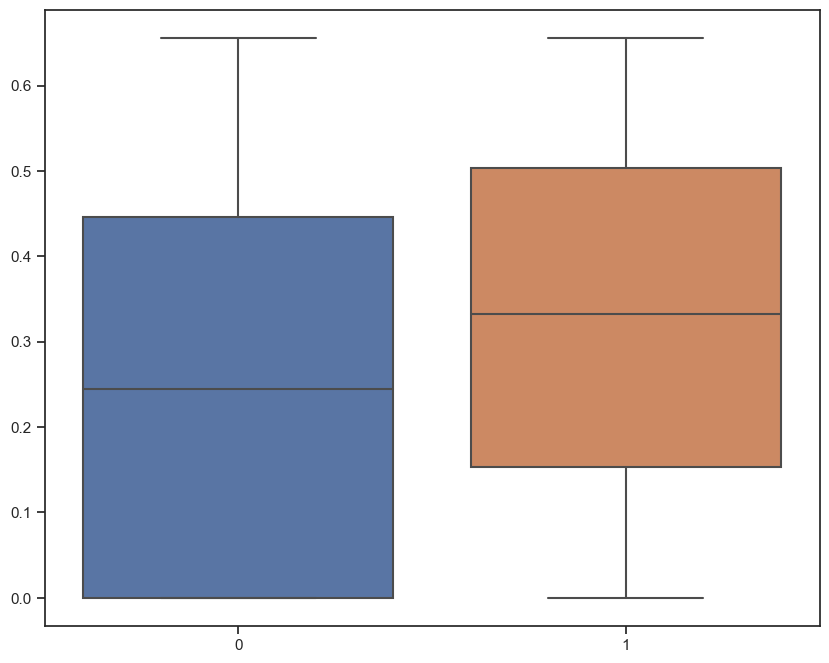

In [ ]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_pubmed]

sns.boxplot(data=all_arr)

In [ ]:
gini=0
clusters = comm_GNN
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.262

In [ ]:
gini=0
clusters = comm_pubmed
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.299

In [ ]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(pubmed_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.11272727272727275
p_value 0.09655505497364732
Jaccard Index: 0.47058823529411764
[2361, 1920, 11024, 616, 5375, 11450, 357, 2708, 1205, 5324, 370, 1842, 7716, 5048, 1474, 735, 2098, 2425, 2128, 3244, 2134, 7130, 4058, 903, 3831, 3190, 3683, 1565, 1683, 8093, 1144, 3136, 2195, 4411, 822, 8708, 4450, 6340, 1761, 6511, 3773, 6794, 4893, 1425, 9471, 1439, 12019, 6813, 1045, 1841, 4546, 6411, 869, 16, 1602, 5661, 4733, 3577, 528, 754, 1817, 6684, 3165, 3531, 668, 3218, 1690, 7456, 116, 284, 4846, 2028, 1416, 11894, 2987, 2862, 3229, 12256, 4194, 3082, 5336, 1660, 7311, 2534, 4043, 3273, 11595, 1043, 1612, 8621, 8372, 5440, 6572, 8576, 5467, 1752, 1402, 1312, 1581, 2112]
[1205, 2361, 1920, 11024, 903, 616, 11450, 370, 1683, 2708, 357, 5375, 11894, 1474, 2128, 4411, 1842, 5324, 3831, 4058, 12019, 5467, 2425, 5440, 3190, 4546, 1602, 2098, 4932, 3082, 9471, 735, 8384, 1565, 6794, 2120, 668, 4262, 1425, 3531, 8093, 4893, 6411, 1045, 3683, 284, 7716, 2134, 9808, 5661, 7130, 2195, 3441, 50

In [ ]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(pubmed_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.07757575757575759
p_value 0.25279087011145884
Jaccard Index: 0.5748031496062992
[11024, 11450, 12019, 17025, 17194, 15952, 18728, 14893, 12256, 17019, 16541, 18811, 15841, 15735, 18743, 17499, 17415, 14742, 18742, 17026, 12066, 11894, 18770, 18809, 13940, 11595, 18035, 14353, 13623, 18736, 11456, 11816, 15713, 14008, 16347, 17493, 16033, 17301, 18221, 12457, 5375, 18745, 8576, 18178, 15325, 8372, 15577, 17649, 16989, 16918, 10600, 18508, 17933, 17701, 18897, 13844, 14603, 6511, 14640, 18765, 12349, 11907, 16754, 13677, 19002, 18841, 17365, 18753, 18347, 17899, 17819, 14194, 15025, 18768, 10265, 15788, 11449, 14284, 18572, 15467, 13633, 18726, 17034, 9471, 18949, 17193, 12649, 16214, 14862, 14305, 13525, 8998, 11188, 12298, 16697, 7780, 18614, 16676, 14515, 15498]
[11450, 12019, 11894, 11024, 18728, 17019, 13940, 15952, 18809, 17819, 15841, 17025, 14742, 17194, 17026, 18745, 11816, 11372, 12256, 15864, 17499, 15788, 17415, 18768, 17701, 17899, 14893, 14353, 14603, 16214, 18811, 

In [ ]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_pubmed_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: -0.10424242424242425
p_value 0.12436476688272464
Jaccard Index: 0.8018018018018018
[11450, 11024, 11390, 11894, 12019, 8998, 10441, 11372, 9471, 10575, 8372, 6684, 5440, 11816, 8384, 4893, 6411, 11449, 8886, 8862, 14194, 10276, 9921, 12457, 5467, 9965, 5106, 14742, 10433, 7756, 4181, 13364, 1205, 13256, 5661, 8509, 9808, 10308, 12972, 8106, 7780, 8405, 10265, 8626, 11468, 5324, 14515, 7711, 5224, 3831, 15189, 11866, 15498, 9775, 8024, 13940, 7154, 6511, 4537, 9634, 11814, 9192, 2361, 4149, 3667, 10431, 8668, 15841, 11099, 4237, 15325, 5968, 7852, 11989, 4445, 4194, 10796, 8093, 7295, 17019, 3531, 8629, 10540, 4586, 5839, 3956, 7445, 15735, 2623, 14754, 11084, 8296, 12349, 8089, 11944, 10185, 10595, 15864, 4411, 5048]
[11450, 11024, 11390, 11894, 12019, 8998, 10441, 9471, 11372, 10575, 8372, 6684, 11816, 4893, 14194, 6411, 10276, 8862, 11449, 14742, 8886, 12457, 9921, 6511, 9965, 8626, 13364, 5440, 8384, 10433, 5106, 8405, 1205, 7780, 7711, 3831, 13256, 12972, 8024, 9808, 5324, 546

In [ ]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_pubmed_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.09473684210526316
p_value 0.5858584459782121
Jaccard Index: 0.5384615384615384
[18809, 18960, 18957, 18736, 18898, 18745, 17590, 18906, 18942, 18897, 18866, 18787, 18080, 18871, 19288, 18145, 18820, 18733, 18867, 18670]
[18736, 18957, 18809, 18906, 17590, 18745, 18897, 18898, 18871, 18787, 18960, 18942, 18673, 19288, 18245, 18728, 17301, 18820, 17415, 18743]


In [ ]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_pubmed_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.02868686868686869
p_value 0.6723736338983716
Jaccard Index: 0.8018018018018018
[18831, 18363, 18238, 19443, 19305, 18029, 18753, 18820, 19022, 18889, 17824, 18159, 19648, 18670, 18673, 18988, 18903, 17933, 17820, 18639, 18881, 18967, 19001, 18249, 19293, 18148, 17222, 19661, 18952, 19119, 19681, 17899, 17305, 18975, 17018, 17332, 18742, 18870, 18912, 18347, 18736, 17819, 18843, 18949, 18614, 18728, 19336, 18722, 17053, 18586, 17847, 18929, 16747, 17255, 19008, 18452, 18380, 17616, 18740, 18785, 18744, 16754, 18771, 17701, 18719, 17649, 17856, 19569, 18706, 19442, 18838, 18474, 18294, 18179, 17816, 19245, 19067, 18468, 17022, 17901, 19116, 19331, 18990, 19029, 16129, 17815, 18738, 18910, 18694, 16826, 15025, 18779, 18811, 18961, 18758, 16843, 19014, 17057, 17839, 18812]
[18363, 18753, 18159, 19022, 18238, 19443, 18029, 18831, 19305, 17824, 18820, 19648, 18889, 19119, 19661, 17933, 18903, 17820, 18988, 19293, 19001, 18639, 18148, 18614, 18673, 18952, 18670, 18949, 18870, 18881, 18